In [1]:
%load_ext rpy2.ipython
# Turning on in-IPy R capabilities

###This is the next step

In [2]:
%%R
library(phyloseq)
library(vegan)
library(plyr)
library(dplyr)
library(ggplot2)
library(picante)
library(ape)

/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: permute

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: This is vegan 2.4-1

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinter

../../SeqData/fulltree.tre
../../SeqData/otu_table.tax.meta.biom
../../SeqData/otus.pick.fasta

In [3]:
%%R
# Pulling in and converting the tree file to "phylo" format
MyTree = read.tree("../../SeqData/fulltree.tre")

In [4]:
%%R
Tips = MyTree$tip.label

In [5]:
%%R
NewTips = gsub('\'',"",Tips)
NewTips

   [1] "43_439"       "73_210971"    "71_438806"    "73.2_32914"  
   [5] "69_2370"      "67.2_21506"   "67_26460"     "96_50315"    
   [9] "58_38953"     "68.2_10024"   "71_363437"    "76_1527980"  
  [13] "73.2_1239923" "71.2_1562360" "73.2_1156546" "73_37380"    
  [17] "3_215809"     "65_313541"    "72.2_1012693" "71.2_486172" 
  [21] "3_602776"     "73.2_546370"  "38_220628"    "73_774090"   
  [25] "3_218388"     "73_732918"    "65_11911"     "70.2_1853"   
  [29] "95_2792"      "72_1316358"   "72_12468"     "74_50643"    
  [33] "39_1658282"   "28_51347"     "74.2_3363"    "72.2_365389" 
  [37] "73.2_166089"  "89_15230"     "77_289126"    "71.2_1442785"
  [41] "73_18063"     "76.2_1502428" "73.2_76823"   "75_83948"    
  [45] "73.2_494431"  "3_1073171"    "73_42115"     "77_355507"   
  [49] "73.2_623496"  "3_1819336"    "74.2_86230"   "72.2_247550" 
  [53] "3_421491"     "3_428517"     "72_1348149"   "3_111045"    
  [57] "76_319684"    "75.2_1266059" "75.2_490359"  "10_427174

In [6]:
%%R
MyTree$tip.label = gsub("\'","",MyTree$tip.label)

In [ ]:
%%R
# Tree tip labels have quotation marks in them that might be thwarting the nti calculator.


In [7]:
%%R
physeq = import_biom("../../../16S/SeqData/otu_table.tax.meta.biom", tree = "../../SeqData/fulltree.tre", parseFunction = parse_taxonomy_greengenes)

In [8]:
%%R
Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
physeq = ps.merged
physeq = subset_samples(physeq,sample_sums(physeq)>1500)

In [9]:
%%R
Comm = as.data.frame(otu_table(physeq))
# Takes the OTU table out of its physeq object and stores it as a data frame

In [27]:
%%R
#nri = ses.mpd(Comm[,-1],cophenetic(MyTree),null.model="taxa.labels",runs=10)
# Cophenetic takes the phylogenetic distances of the tree, and turns it into a distance matrix.
# 10 runs took <10 min.

In [110]:
%%R
#nri100 = ses.mpd(Comm[,-1],cophenetic(MyTree),null.model="taxa.labels",runs=100)
#write.csv(nri100,"../data/nri100.csv")
# Cophenetic takes the phylogenetic distances of the tree, and turns it into a distance matrix.

In [10]:
%%R
nri1000 = ses.mpd(Comm[,-1],cophenetic(MyTree),null.model="taxa.labels",runs=1000)
write.csv(nri1000,"../data/nri1000.csv")
# Cophenetic takes the phylogenetic distances of the tree, and turns it into a distance matrix.

In [30]:
%%R
#nti = ses.mntd(Comm[,-1],cophenetic(MyTree),null.model="taxa.labels",runs=10)

In [111]:
%%R
#nti100 = ses.mntd(Comm[,-1],cophenetic(MyTree),null.model="taxa.labels",runs=100)
#write.csv(nti100,"../data/nti100.csv")

In [11]:
%%R
nti1000 = ses.mntd(Comm[,-1],cophenetic(MyTree),null.model="taxa.labels",runs=1000)
write.csv(nti1000,"../data/nti1000.csv")

In [112]:
%%R
#nti100$Sample = row.names(nti100)
#NXI = merge(nti100,nri100)

In [20]:
%%R
dim(nri1000)

[1] 58  8


In [12]:
%%R
nti1000$Sample = row.names(nti1000)
NXI = merge(nti1000,nri1000)

In [13]:
%%R
row.names(NXI) = NXI$Sample
NXI$Trtmt = substr(NXI$Sample,1,1)
NXI
#Full dataset. Want to add back Q,F,K, etc.

         ntaxa runs   mntd.obs mntd.rand.mean mntd.rand.sd mntd.obs.rank
Q_2.5_30  1030 1000 0.08287921     0.14517310 0.0032655286             1
F_2_33    1059 1000 0.08536862     0.14356215 0.0031700327             1
Q_2_33    1158 1000 0.08446609     0.13880378 0.0028545552             1
F_2.5_13  1162 1000 0.08770017     0.13867056 0.0028602753             1
K_3_23     120 1000 0.19090717     0.30359329 0.0171338551             1
F_3_44    1202 1000 0.08324397     0.13689344 0.0027546846             1
F_2_28    1278 1000 0.08186272     0.13370876 0.0024682226             1
K_2.5_16  1379 1000 0.10455824     0.12977337 0.0023316405             1
Q_2.5_3   1464 1000 0.08150318     0.12679255 0.0021922222             1
S_2.5_13  1527 1000 0.07966316     0.12487155 0.0021577014             1
F_2_9     1553 1000 0.08468500     0.12389994 0.0021533359             1
S_2.5_16  1564 1000 0.07858934     0.12370388 0.0021380212             1
F_3_22    1570 1000 0.08059866     0.12339265 0.002

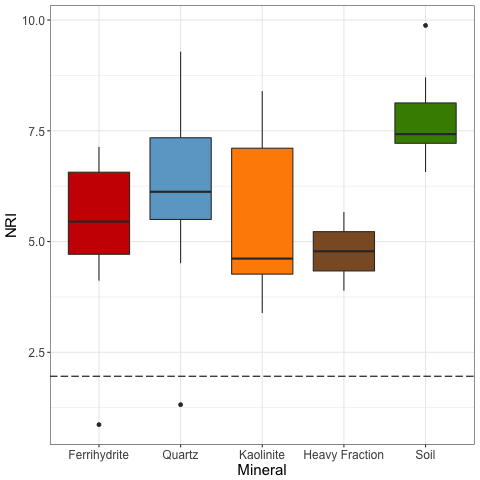

In [21]:
%%R
df = NXI
df = df %>%
    filter(Trtmt != "B")

df$Trtmt = ordered(df$Trtmt, levels = c("F", "Q", "K", "H", "S"))
df$Trtmt = revalue(df$Trtmt, c("F"="Ferrihydrite", "Q"="Quartz", "K"="Kaolinite", "H"="Heavy Fraction", "S"="Soil"))
p = ggplot(df, aes(x = Trtmt, y = -mpd.obs.z, fill = Trtmt))

p = p + geom_boxplot()

p = p + scale_fill_manual(values=c("red3","skyblue3","darkorange","tan4","chartreuse4","gold1"))

p = p + theme_bw()

p = p + guides(fill = "none")
p = p + theme(legend.position = "none")

p = p + theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12))
p = p + theme(axis.title = element_text(size = 15))
p = p + geom_hline(yintercept = 1.96, linetype = "longdash")
p = p + labs(x="Mineral",y="NRI")

p

In [22]:
%%R
ggsave(filename="NRI.1000.jpg", p, width=6, height=6)

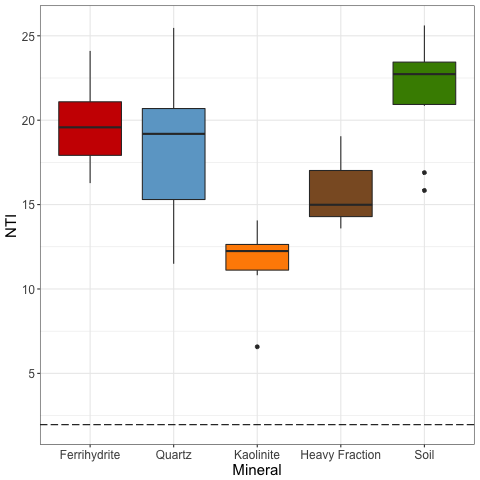

In [23]:
%%R
df = NXI
df = df %>%
    filter(Trtmt != "B")

df$Trtmt = ordered(df$Trtmt, levels = c("F", "Q", "K", "H", "S"))
df$Trtmt = revalue(df$Trtmt, c("F"="Ferrihydrite", "Q"="Quartz", "K"="Kaolinite", "H"="Heavy Fraction", "S"="Soil"))

p = ggplot(df, aes(x = Trtmt, y = -mntd.obs.z, fill = Trtmt))

p = p + geom_boxplot()

p = p + scale_fill_manual(values=c("red3","skyblue3","darkorange","tan4","chartreuse4","gold1"))

p = p + theme_bw()

p = p + guides(fill = "none")
p = p + theme(legend.position = "none")

p = p + theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12))
p = p + theme(axis.title = element_text(size = 15))

p = p + geom_hline(yintercept = 1.96, linetype = "longdash")

p = p + labs(x="Mineral",y="NTI")

p

In [24]:
%%R
ggsave(filename="NTI.1000.jpg", p, width=6, height=6)